In [1]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [3]:
# Get case data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

dfCase = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',encoding='latin1',delimiter=';')
dfCase['Dato'] = pd.to_datetime(dfCase['Dato'])

In [4]:
# Get case data
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase2 = pd.read_csv(latestdir+'/Municipality_cases_time_series.csv',delimiter=';')
dfCase2['SampleDate'] = pd.to_datetime(dfCase2['SampleDate'])

In [5]:
# Get test data
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfTest = pd.read_csv(latestdir+'/Municipality_tested_persons_time_series.csv',delimiter=';')
dfTest['PrDate_adjusted'] = pd.to_datetime(dfTest['PrDate_adjusted'])
dfTest['Dato'] = pd.to_datetime(dfTest['PrDate_adjusted'])
# dfTest

In [6]:

curCase = dfCase[dfCase.Kommunenavn == 'København']['Bekræftede tilfælde i alt']
curTest = dfTest.Copenhagen.values[-len(curCase):]
curPos = curCase/curTest 
curDates = dfTest.Dato.values[-len(curCase):]


curCase = curCase[:-1]
curTest = curTest[:-1]
curPos = curPos[:-1]
curDates = curDates[:-1]

(0.0, 9030.0)

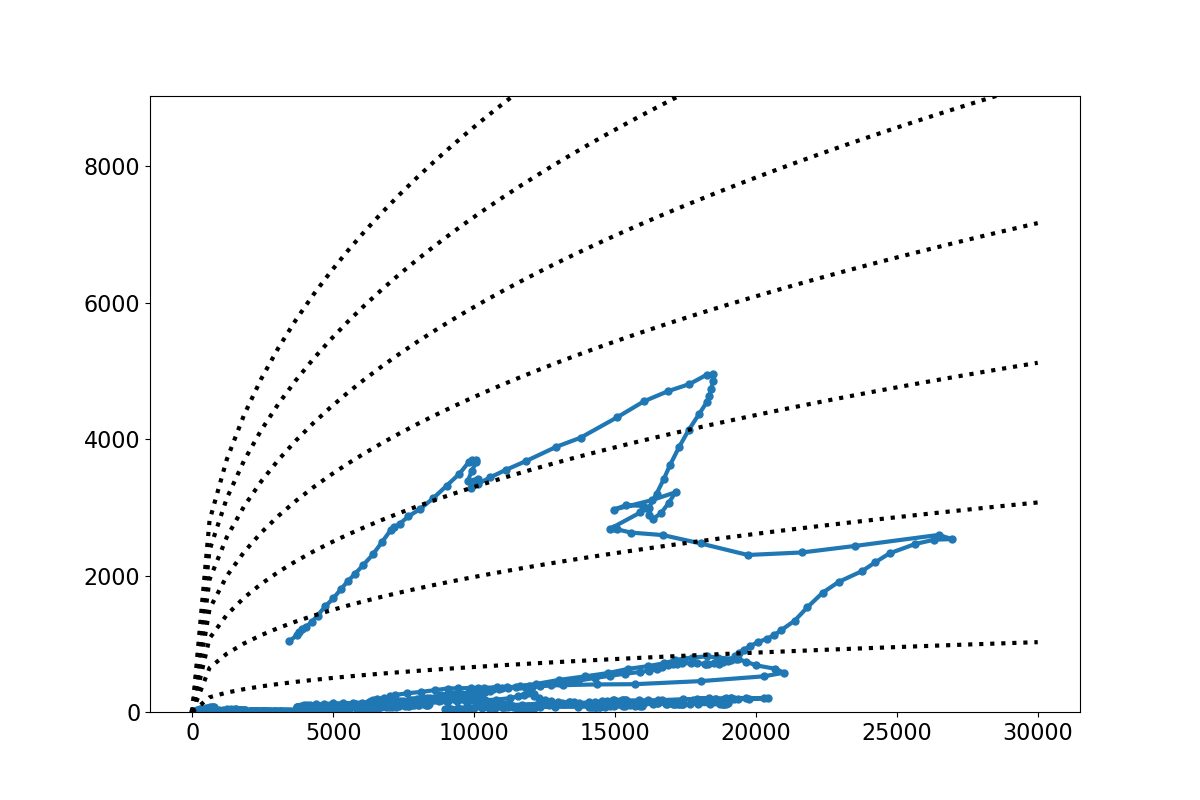

In [7]:


testSpan = np.linspace(0,30)*1000
baseTest = 50000
baseTest = 5000
beta =  0.4
 

fig,ax1 = plt.subplots() 
ax1.plot(pf.rnMean(curTest),pf.rnMean(curCase),'.-')

# baseCase = 5000
# caseSpan = baseCase * (testSpan/baseTest)**beta
# ax1.plot(testSpan,caseSpan,'k:')
# baseCase = 2000
# caseSpan = baseCase * (testSpan/baseTest)**beta
# ax1.plot(testSpan,caseSpan,'k:')
baseCase = 1000
for baseCase in np.arange(500,7500,1000):
    caseSpan = baseCase * (testSpan/baseTest)**beta
    ax1.plot(testSpan,caseSpan,'k:')

# cases1 = curCase * (curTest/baseTest)**beta
# ax1.plot(pf.rnMean(curTest),pf.rnMean(cases1))

ax1.set_ylim(top=np.max(curCase)*1.5,bottom=0)

(18536.0, 19091.5)

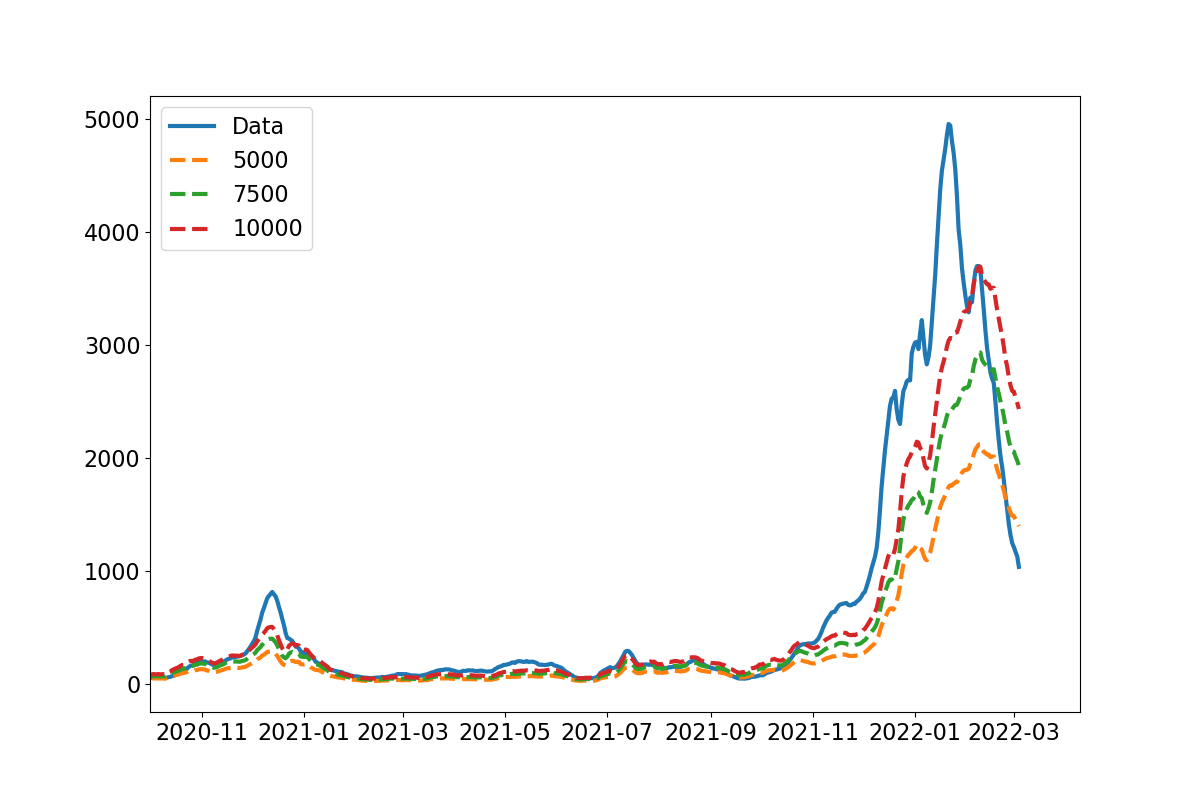

In [8]:
fig,ax = plt.subplots()

ax.plot(pf.rnTime(curDates),pf.rnMean(curCase),label='Data')

beta = 0.8
baseTestsToUse = [5000,7500,10000]
for baseTest in baseTestsToUse:
    cases1 = curCase / (curTest/baseTest)**beta
    ax.plot(pf.rnTime(curDates),pf.rnMean(cases1),'--',label=str(baseTest))

ax.legend()

ax.set_xlim(left=np.datetime64('2020-10-01'))

In [9]:
dfToSave = pd.DataFrame() 

dfToSave['Dato'] = curDates
dfToSave['Test'] = curTest
dfToSave['Data'] = curCase.values 
baseTest = 5000
dfToSave['Correct5000'] = curCase.values / (curTest/baseTest)**beta
baseTest = 7500
dfToSave['Correct7500'] = curCase.values / (curTest/baseTest)**beta
baseTest = 10000
dfToSave['Correct10000'] = curCase.values / (curTest/baseTest)**beta

baseTest = 5000
dfToSave['Index5000'] = 1 / (curTest/baseTest)**beta
baseTest = 7500
dfToSave['Index7500'] = 1 / (curTest/baseTest)**beta
baseTest = 10000
dfToSave['Index10000'] = 1 / (curTest/baseTest)**beta



dfToSave
dfToSave.to_csv(path_data+'../CopenhagenTestCorrected.csv',index=False)

# Old

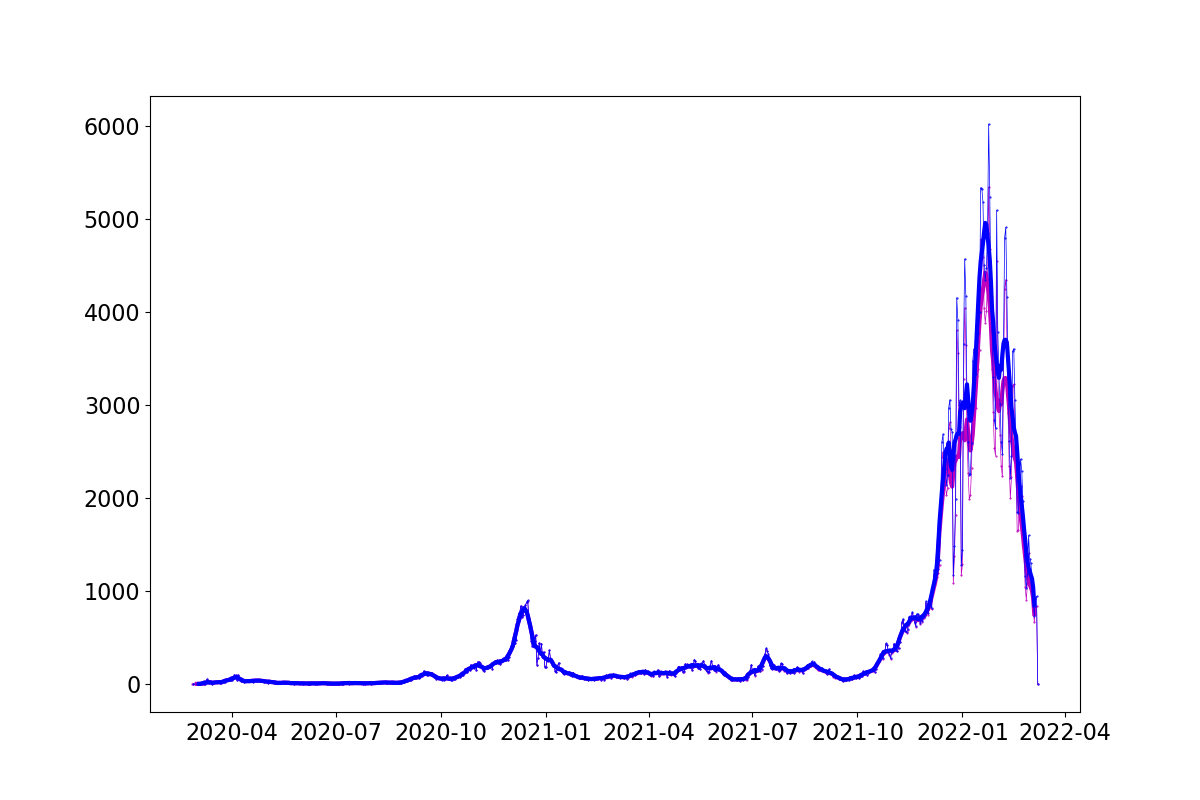

In [10]:
fig,ax1 = plt.subplots() 

curdf = dfCase[dfCase.Kommunenavn == 'København']

ax1.plot(dfCase2.SampleDate,dfCase2.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(dfCase2.SampleDate),pf.rnMean(dfCase2.Copenhagen),'m')
ax1.plot(curdf.Dato,curdf['Bekræftede tilfælde i alt'],'b.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(curdf.Dato),pf.rnMean(curdf['Bekræftede tilfælde i alt']),'b')

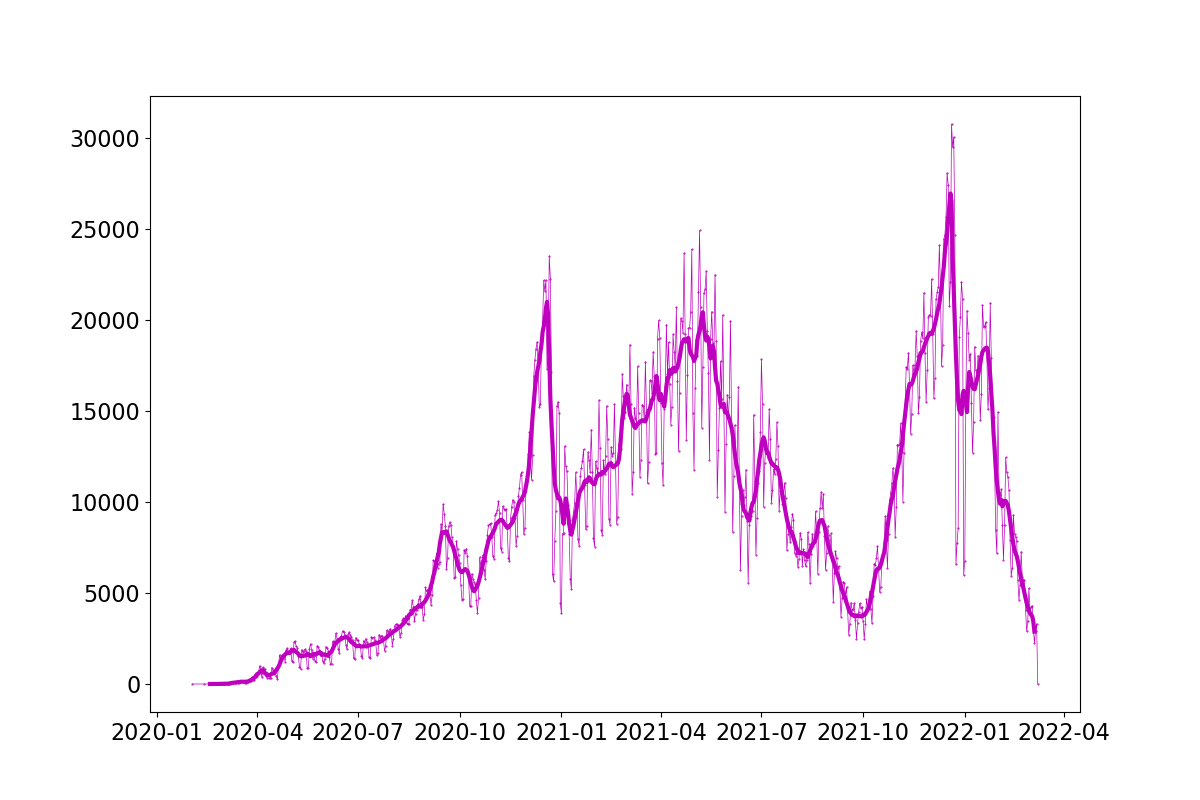

In [11]:
fig,ax1 = plt.subplots() 

ax1.plot(dfTest.Dato,dfTest.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(dfTest.Dato),pf.rnMean(dfTest.Copenhagen),'m')

In [12]:
len(dfTest)
# len(dfCase2)

curPos = dfCase2.Copenhagen.values/dfTest.Copenhagen.values[-len(dfCase2):]
curDates = dfTest.Dato.values[-len(dfCase2):]

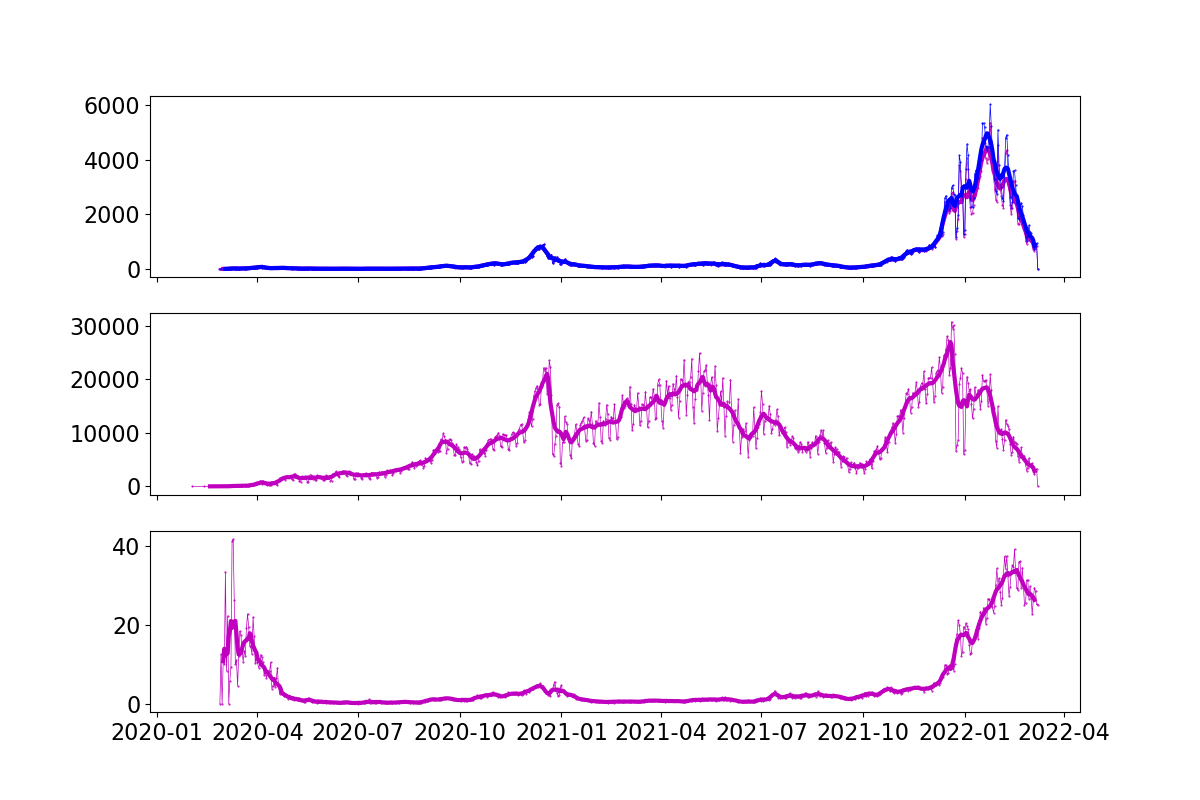

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True) 

ax1.plot(dfCase2.SampleDate,dfCase2.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(dfCase2.SampleDate),pf.rnMean(dfCase2.Copenhagen),'m')
ax1.plot(curdf.Dato,curdf['Bekræftede tilfælde i alt'],'b.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(curdf.Dato),pf.rnMean(curdf['Bekræftede tilfælde i alt']),'b')

ax2.plot(dfTest.Dato,dfTest.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax2.plot(pf.rnTime(dfTest.Dato),pf.rnMean(dfTest.Copenhagen),'m')
ax3.plot(curDates,100*curPos,'m.-',markersize=1,linewidth=0.5)
ax3.plot(pf.rnTime(curDates),100*pf.rnMean(curPos),'m')

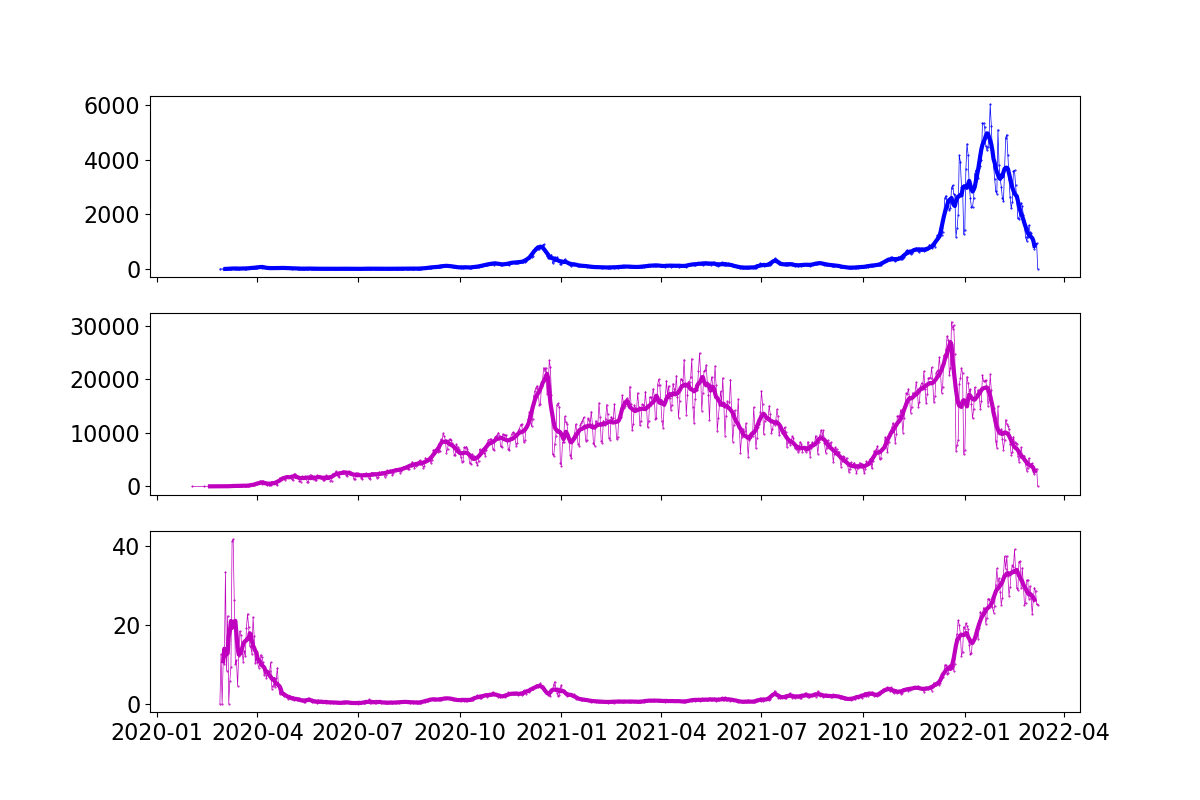

In [14]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True) 

curdf = dfCase[dfCase.Kommunenavn == 'København']
ax1.plot(curdf.Dato,curdf['Bekræftede tilfælde i alt'],'b.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(curdf.Dato),pf.rnMean(curdf['Bekræftede tilfælde i alt']),'b')

ax2.plot(dfTest.Dato,dfTest.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax2.plot(pf.rnTime(dfTest.Dato),pf.rnMean(dfTest.Copenhagen),'m')
ax3.plot(curDates,100*curPos,'m.-',markersize=1,linewidth=0.5)
ax3.plot(pf.rnTime(curDates),100*pf.rnMean(curPos),'m')